# ETH Price Data Analytics — Day 1 (Foundations)

This notebook establishes a descriptive baseline for Ethereum (ETH) price behavior.

The focus is on understanding returns, volatility(You may ask what the hell is this? Idk either, use google, just think this as risk shamanism by guessing and seeing patterns), and drawdowns.
This project does not attempt prediction or trading strategies. We do partial vibe analysis to see if there are any interesting patterns, but with our own domastic living algorithms you don't wanna know yet. Well yall see ... So we are like half Cyborgs team... 


In [2]:
import sys
!{sys.executable} -m pip install yfinance


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 33.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=a5cd348b9395927a641619889339d7bbd3a39caa5d8b14c9dd671060a6cd4501
  Stored in directory: /Users/gavtaka/Library/Caches/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-macosx_10_15_x86_64.whl size=276116 sha256=e0fa77cad5a54abf4bb1f795e4a221ac984fca79f2239ed0bd40cf6785f42e5c
  Stored in directory: /Users/gavtaka/Library/Caches/pip/wheels/e2/48/b6/675a31c56e50b8b343e1ffbb1d9209f0d95025e2cfa0bbeeed
Successfully built multitasking peewee

[notice] A new release of pip is avai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.grid"] = True


In [2]:
eth = yf.download(
    "ETH-USD",
    start="2017-01-01",
    progress=False
)

eth = eth[["Open", "High", "Low", "Close", "Volume"]].dropna()
eth.head()


Price,Open,High,Low,Close,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984


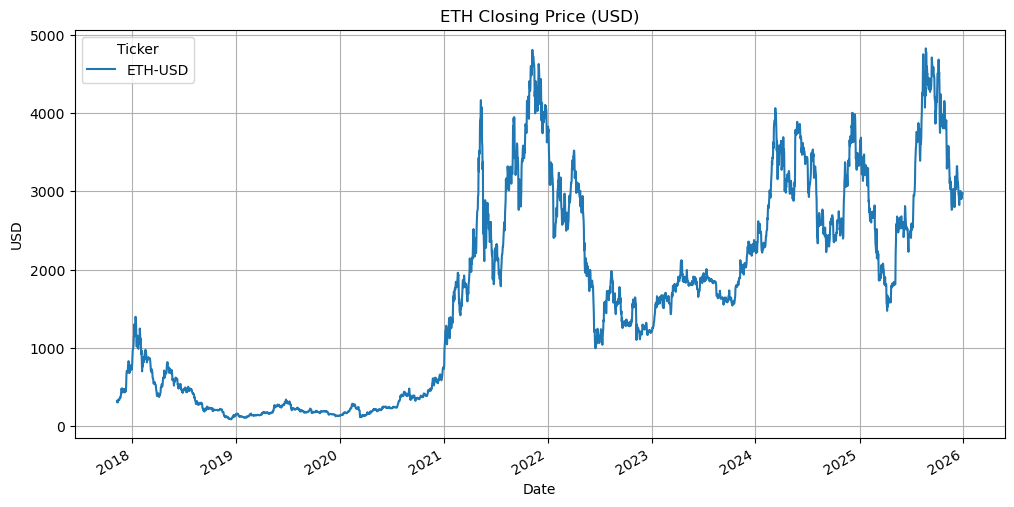

In [3]:
eth["Close"].plot(title="ETH Closing Price (USD)")
plt.ylabel("USD")
plt.show()


In [4]:
eth["return"] = eth["Close"].pct_change()
eth[["Close", "return"]].head()


Price,Close,return
Ticker,ETH-USD,
Date,,
2017-11-09,320.884003,NaN
2017-11-10,299.252991,-0.067411
2017-11-11,314.681000,0.051555
2017-11-12,307.907990,-0.021523
2017-11-13,316.716003,0.028606


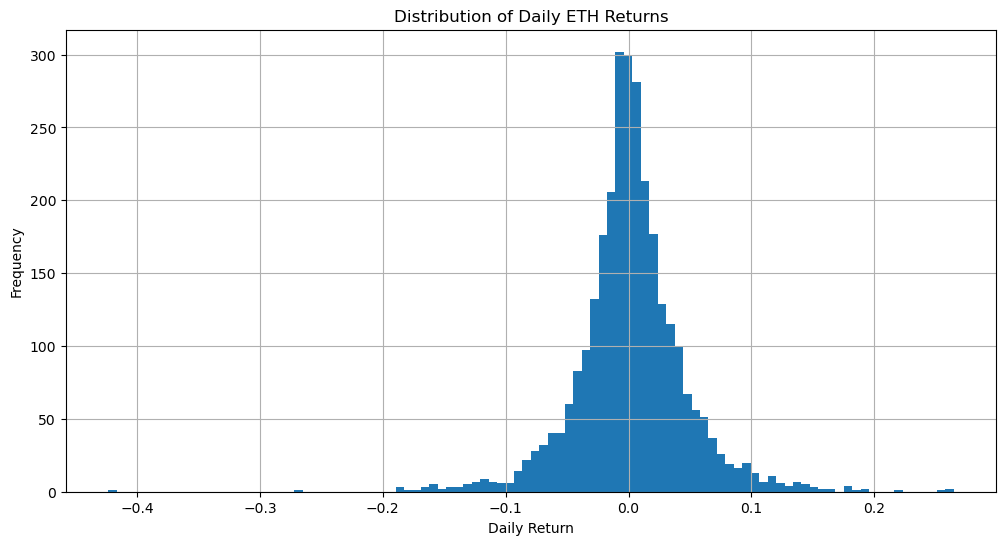

In [5]:
eth["return"].hist(bins=100)
plt.title("Distribution of Daily ETH Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


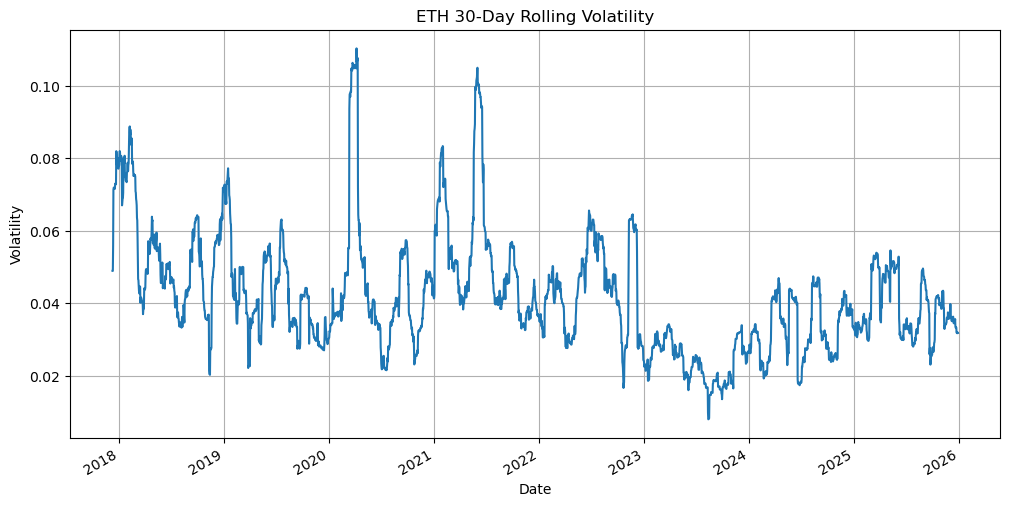

'Long calm valleys\nViolent spikes\nClustering (storms last weeks, not single days)'

In [7]:
eth["vol_30d"] = eth["return"].rolling(30).std()

eth["vol_30d"].plot(title="ETH 30-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()
'''Long calm valleys
Violent spikes
Clustering (storms last weeks, not single days)'''


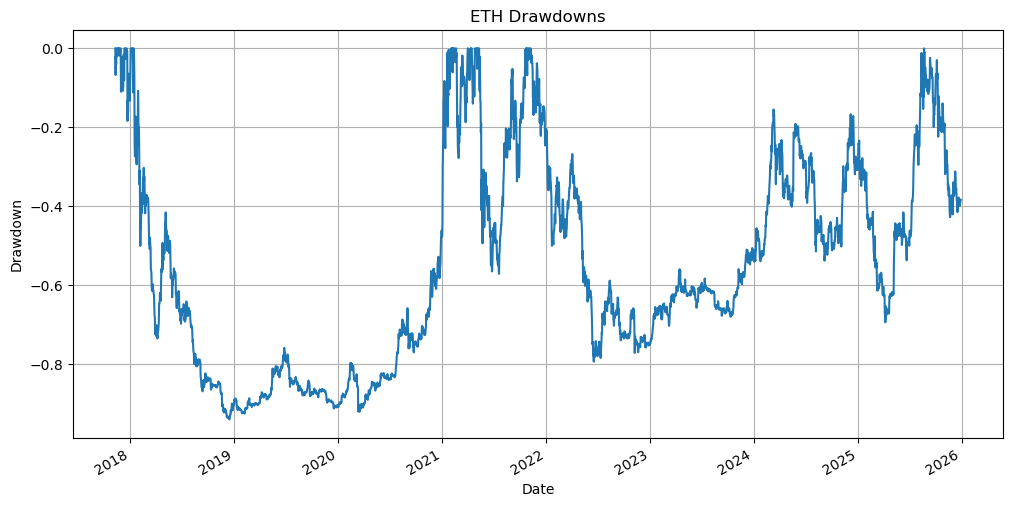

'A drawdown chart\nValues always ≤ 0\nDeep valleys during crashes\nLong recovery periods'

In [11]:
close = eth["Close"]["ETH-USD"]

eth["cum_max"] = close.cummax()
eth["drawdown"] = close / eth["cum_max"] - 1

eth["drawdown"].plot(title="ETH Drawdowns")
plt.ylabel("Drawdown")
plt.show()
'''A drawdown chart
Values always ≤ 0
Deep valleys during crashes
Long recovery periods'''


- Volatility exhibits clustering, indicating persistent risk regimes.
- Drawdowns are deep and long-lasting, often extending well beyond volatility spikes.
- ETH spends most of its time below prior peaks, emphasizing recovery over euphoria.
